In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import NegativeClassOptimization.config as config
from NegativeClassOptimization import preprocessing

In [2]:
#combine all mascotte
mascot_set = set()
for ag in config.ANTIGENS:
    data_path = glob.glob(f'../data/full_data/divided2classes/{ag}_[A-Z]Analyses/{ag}_[A-Z]_MascotteExclusiveSlices.txt',)[0]
    df =  pd.read_csv(data_path, sep='\t',  skiprows=1)
    mascot_set.update(df.Slide.values)

In [7]:
non_mascot_set = set()
for ag in config.ANTIGENS:
    data_paths = glob.glob(f'./torch_models/Frozen_MiniAbsolut_ML/high_vs_95low/seed_0/split_[0-9]*/{ag}_high__vs__{ag}_95low/*_dataset.tsv')
    for data_path in data_paths:
        df=pd.read_csv(data_path, sep='\t')
        non_mascot_set.update(df.Slide.values)

In [6]:
non_mascot_set

,Slide,binds_a_pos_ag,Slide_onehot,X,y
0,AAEIYYDYDDA,0,[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0
1,AAGGTNYLGDF,0,[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0
2,AAQAYLAMDYW,0,[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0
3,AASYSLLFAYW,1,[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,1
4,AAVINLLLSYY,1,[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,1
...,...,...,...,...,...
9995,YYYGRGAFAYW,0,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0
9996,YYYGSRREAMD,0,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0
9997,YYYGSSLLDVW,0,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0
9998,YYYGTWYFDVW,0,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0


In [ ]:
#!pip install matplotlib_venn

In [13]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

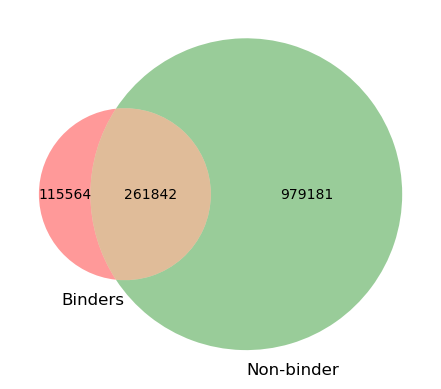

In [17]:
venn2([mascot_set,non_mascot_set], set_labels = ('Binders', 'Non-binder'))

In [ ]:
#next step create some clustering illustrattion

In [62]:
oh_non_mascot = []
for ag in config.ANTIGENS:
    data_paths = glob.glob(f'./torch_models/Frozen_MiniAbsolut_ML/high_vs_95low/seed_0/split_[0-9]*/{ag}_high__vs__{ag}_95low/*_dataset.tsv')
    for data_path in data_paths:
        df=pd.read_csv(data_path, sep='\t')
        df['Slide_onehot'] = df.Slide.apply(preprocessing.onehot_encode)
        #oh = np.array(df.Slide_onehot.values) #need to get o sequences
        oh_non_mascot.extend(df.Slide_onehot.values)

In [63]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(oh_non_mascot)

<AxesSubplot:>

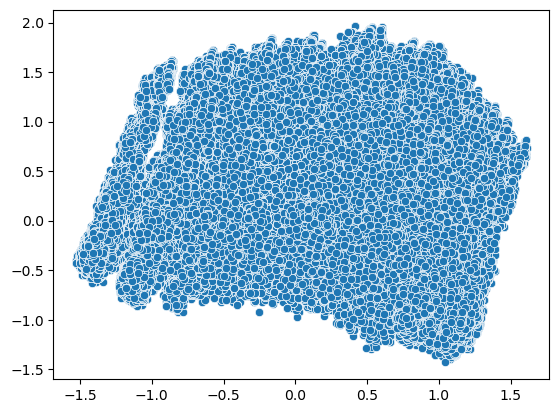

In [64]:
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1])

In [67]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(np.array(oh_non_mascot))

/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/anaconda3/envs/nco/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:>

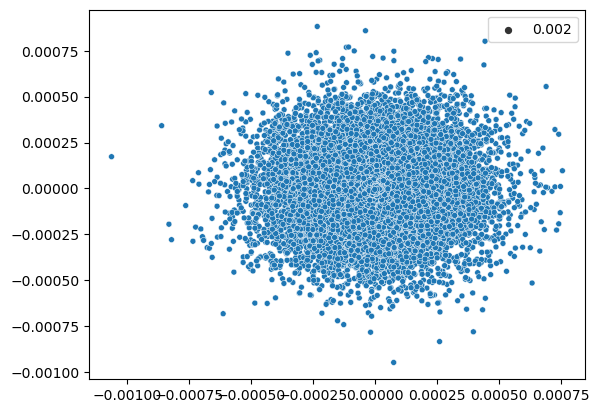

In [71]:
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1],size=0.002)

<AxesSubplot:>

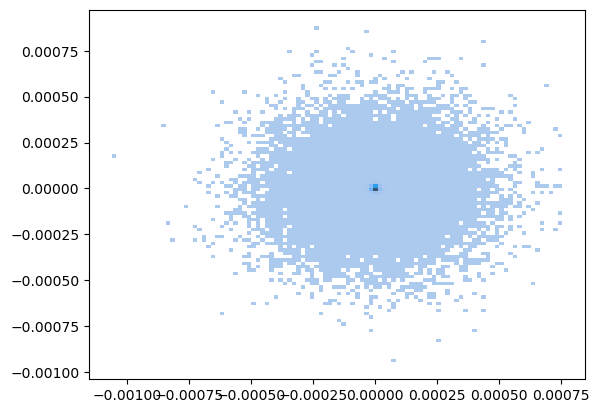

In [79]:
sns.histplot(x=X_tsne[:, 0], y=X_tsne[:, 1], bins=100)
